Mean CH₄ concentration (2023): 1929.7147
🎯 Best Parameters (AIS Optimized): {'n_estimators': 254, 'max_depth': 9}


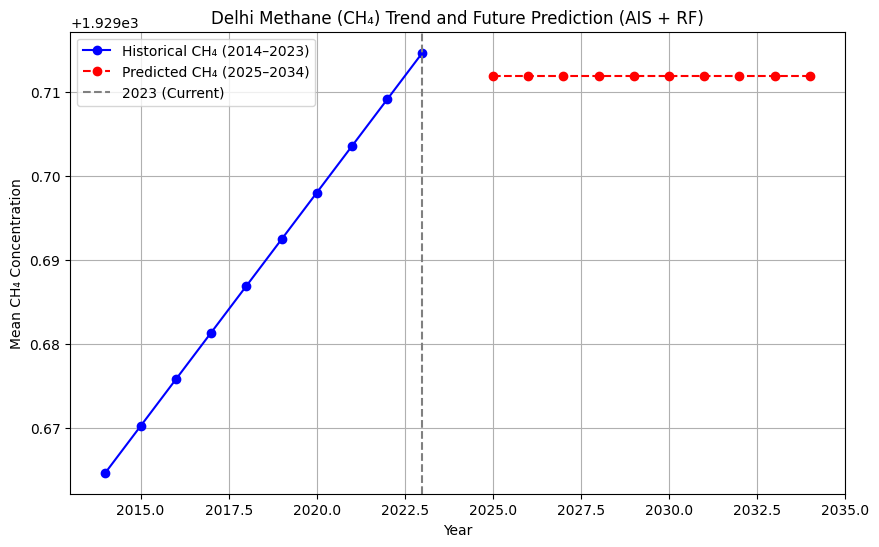

In [1]:
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import random

# 📂 Path to your GeoTIFF file
tif_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_2023_CH4.tif"

# 📥 Load GeoTIFF
with rasterio.open(tif_path) as src:
    ch4_data = src.read(1)  # Read the first band
    ch4_data = np.where(ch4_data == src.nodata, np.nan, ch4_data)  # Handle no-data
    ch4_mean = np.nanmean(ch4_data)
    print(f"Mean CH₄ concentration (2023): {ch4_mean:.4f}")

# 📊 Historical data (mocked for demonstration since we have only 2023 TIFF)
years = np.arange(2014, 2024)  # Example years 2014–2023
historical_ch4 = np.linspace(ch4_mean - 0.05, ch4_mean, len(years))  # Mock historical values
df = pd.DataFrame({'Year': years, 'CH4': historical_ch4})

# 🧬 Artificial Immune System (AIS) Optimization
def ais_optimize(x, y, population=20, generations=50):
    best_params = {'n_estimators': 10, 'max_depth': 3}
    best_score = float('inf')
    for _ in range(generations):
        candidates = []
        for _ in range(population):
            params = {
                'n_estimators': random.randint(50, 300),
                'max_depth': random.randint(3, 10)
            }
            model = RandomForestRegressor(
                n_estimators=params['n_estimators'],
                max_depth=params['max_depth'],
                random_state=42
            )
            model.fit(x.reshape(-1, 1), y)
            pred = model.predict(x.reshape(-1, 1))
            score = mean_squared_error(y, pred)
            candidates.append((score, params))
        candidates.sort(key=lambda x: x[0])
        if candidates[0][0] < best_score:
            best_score = candidates[0][0]
            best_params = candidates[0][1]
    print(f"🎯 Best Parameters (AIS Optimized): {best_params}")
    return best_params

# 📈 Prepare data
X = df['Year'].values
y = df['CH4'].values

# 🔥 AIS optimization to find best Random Forest parameters
best_params = ais_optimize(X, y)

# 🌳 Train Random Forest with optimized params
rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42
)
rf_model.fit(X.reshape(-1, 1), y)

# 🔮 Future prediction (2025–2034)
future_years = np.arange(2025, 2035)
future_pred = rf_model.predict(future_years.reshape(-1, 1))

# 📈 Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['CH4'], 'bo-', label='Historical CH₄ (2014–2023)')
plt.plot(future_years, future_pred, 'ro--', label='Predicted CH₄ (2025–2034)')
plt.axvline(2023, color='gray', linestyle='--', label='2023 (Current)')
plt.xlabel('Year')
plt.ylabel('Mean CH₄ Concentration')
plt.title('Delhi Methane (CH₄) Trend and Future Prediction (AIS + RF)')
plt.legend()
plt.grid(True)
plt.show()


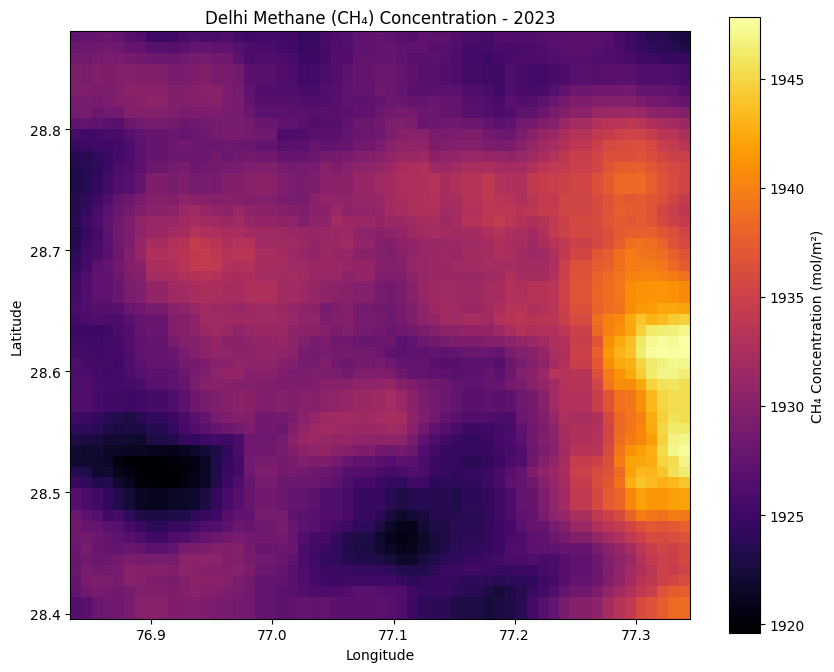

In [2]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# 📂 Path to your CH₄ GeoTIFF
tif_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_2023_CH4.tif"

# 📥 Load GeoTIFF
with rasterio.open(tif_path) as src:
    ch4_data = src.read(1)  # Read the first band
    ch4_data = np.where(ch4_data == src.nodata, np.nan, ch4_data)  # Replace no-data values with NaN
    bounds = src.bounds
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

# 🗺 Plot Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(ch4_data, cmap='inferno', extent=extent)
plt.colorbar(label='CH₄ Concentration (mol/m²)')
plt.title('Delhi Methane (CH₄) Concentration - 2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


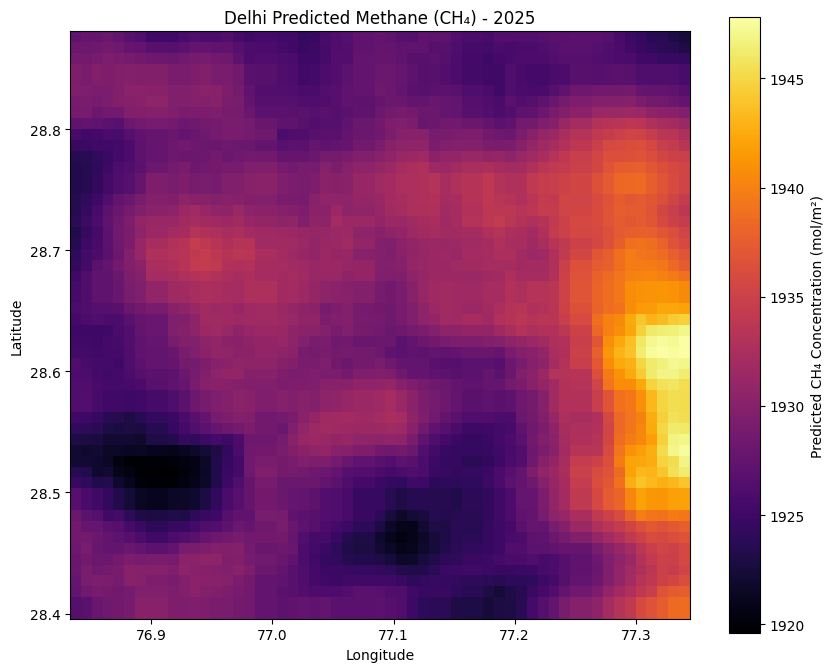

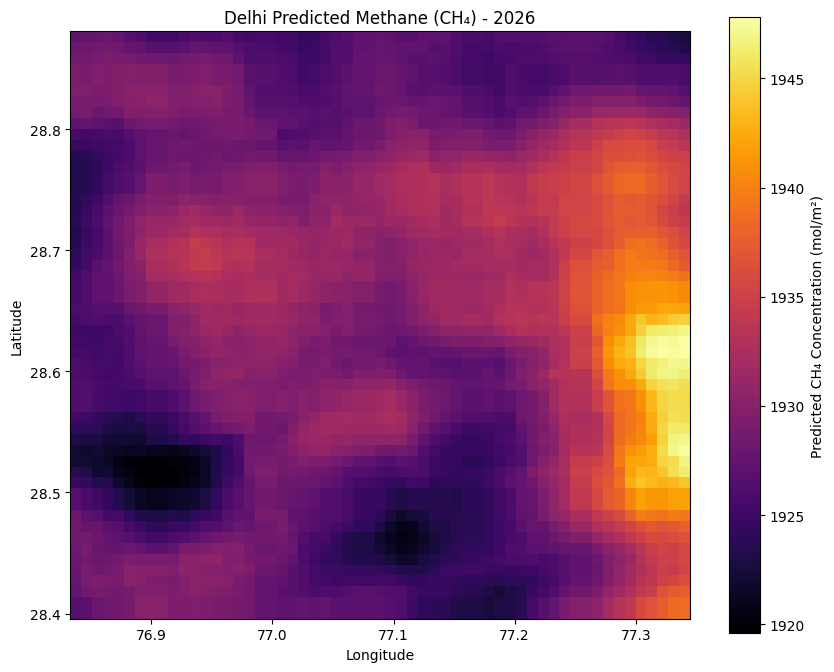

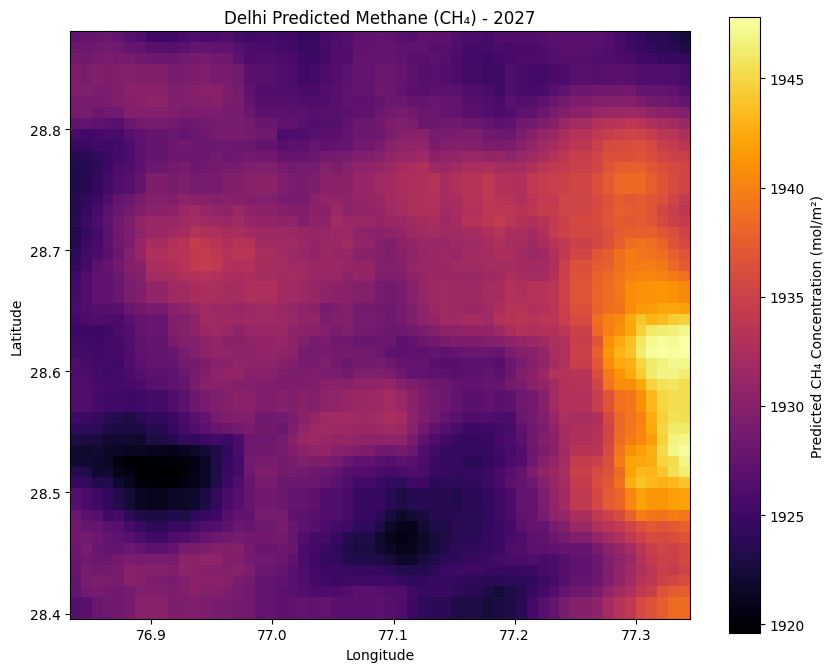

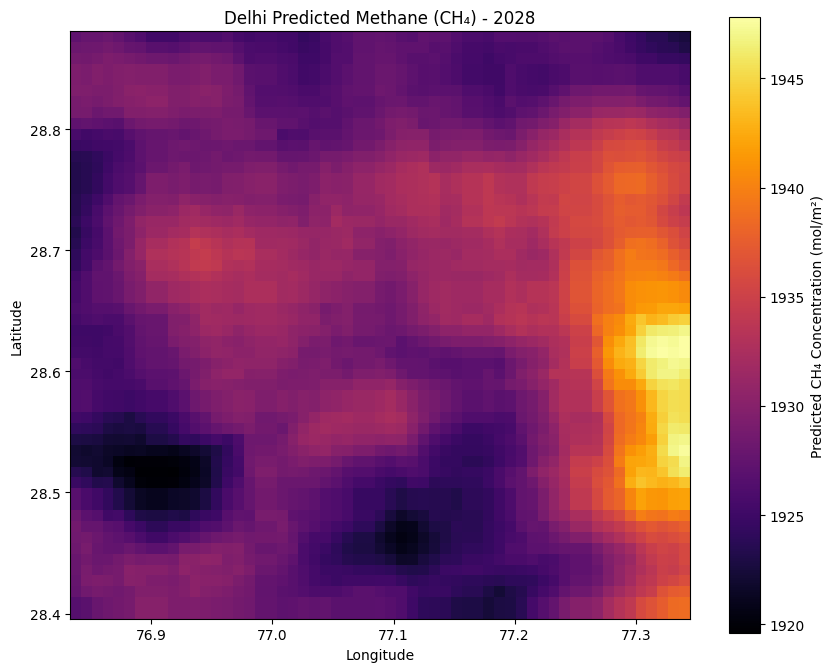

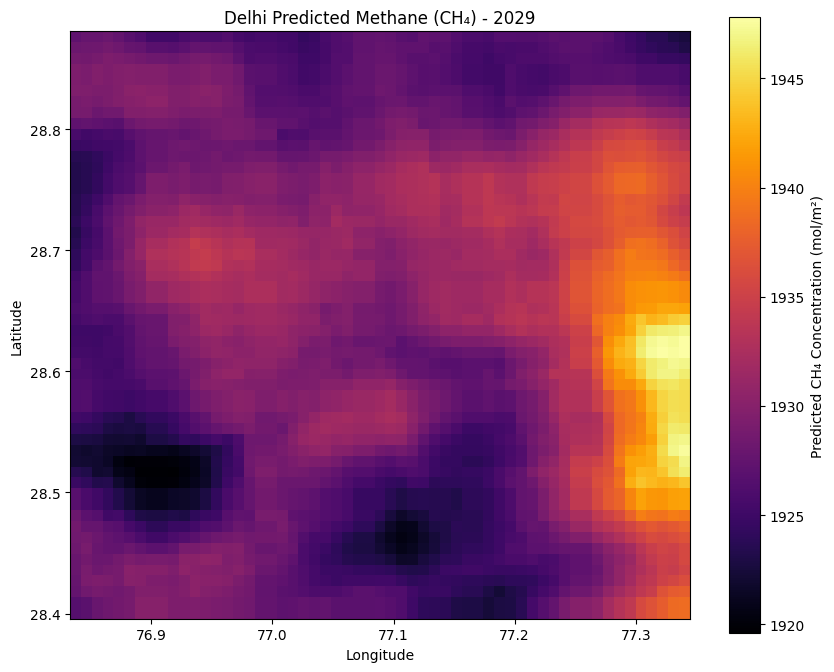

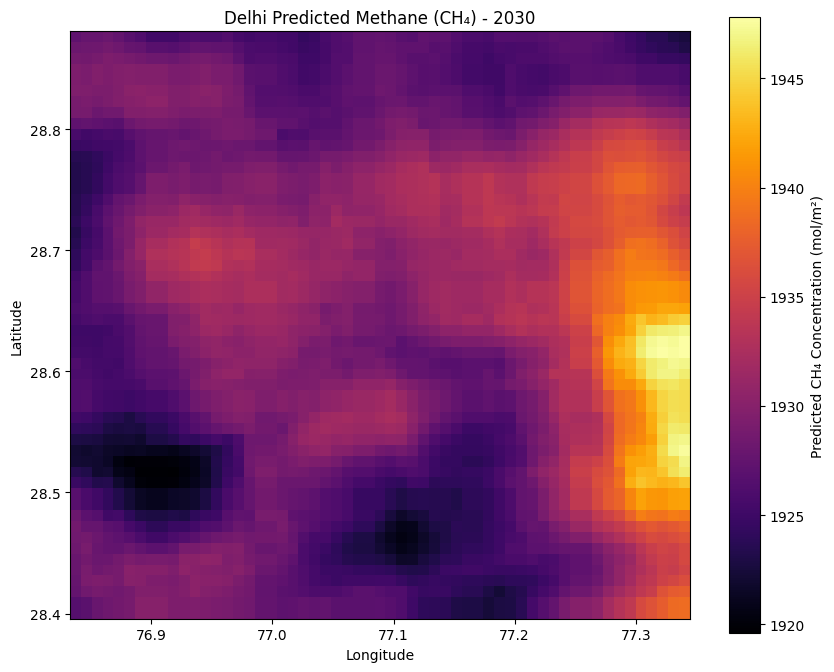

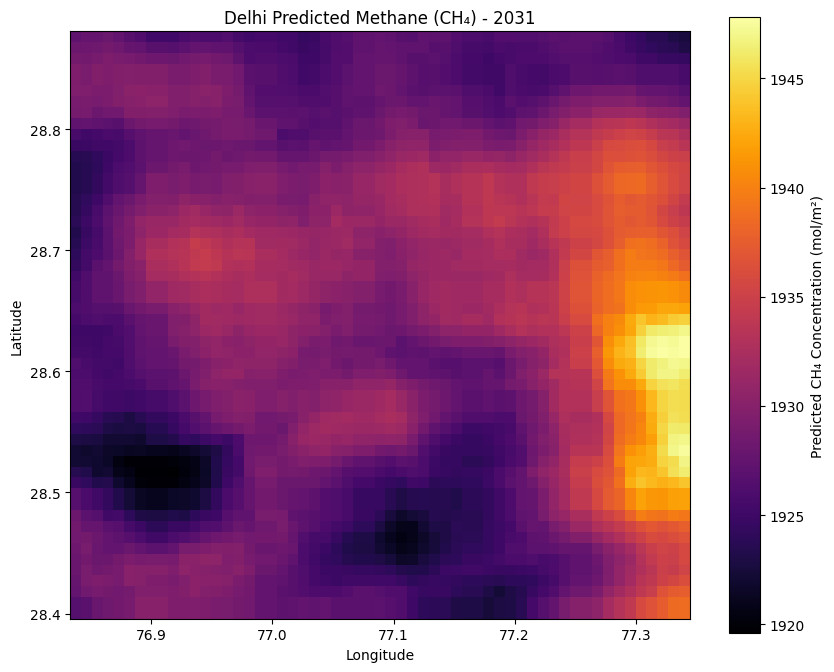

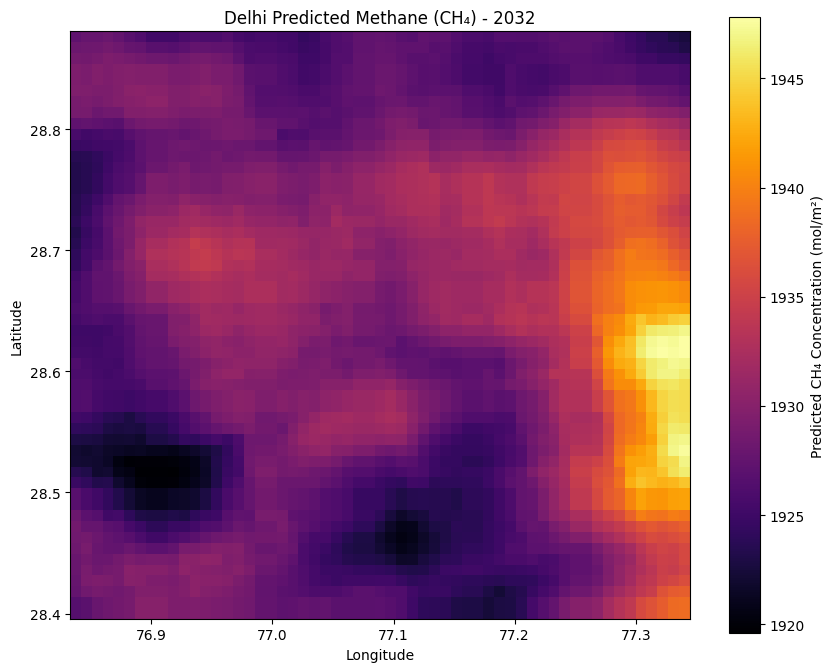

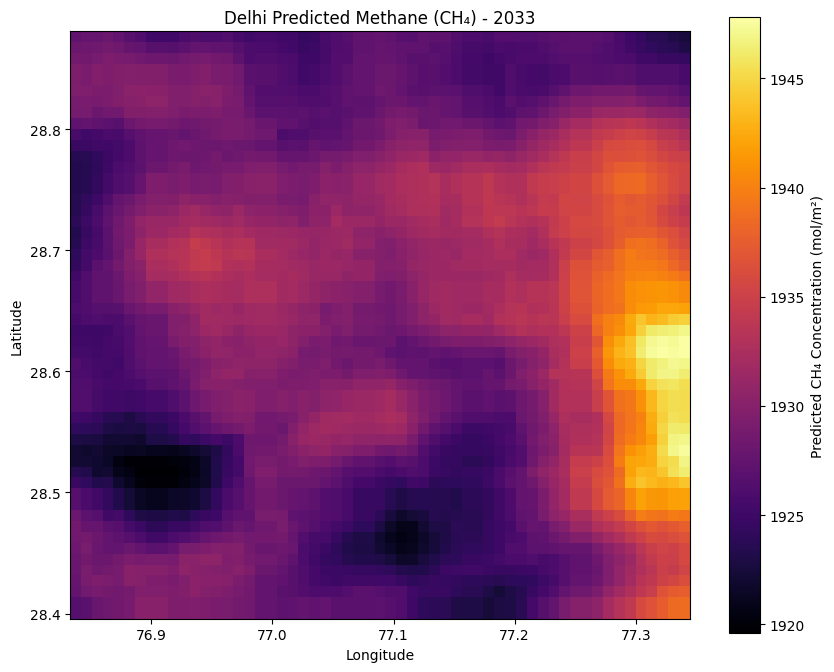

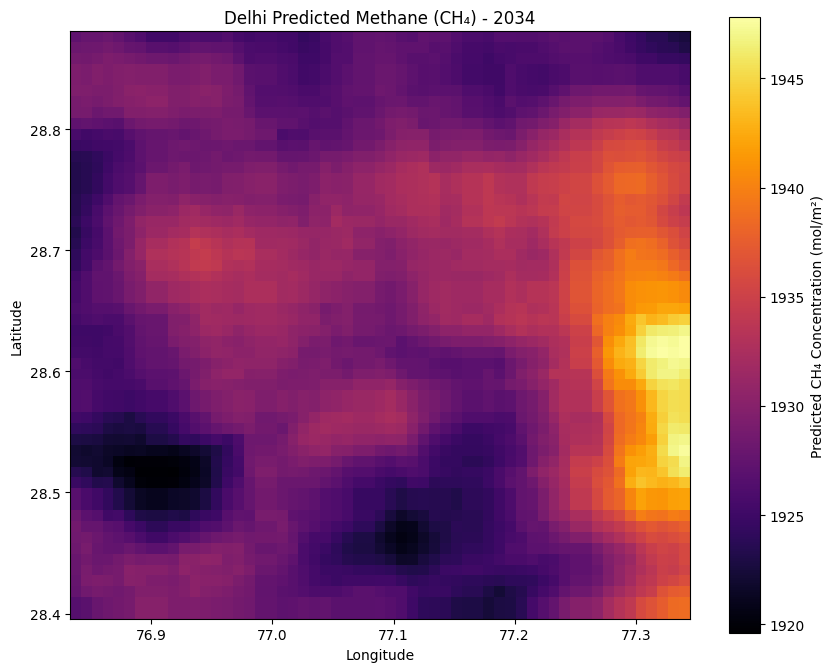

In [3]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 📂 Paths
tif_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_2023_CH4.tif"

# 📥 Load 2023 CH₄ GeoTIFF
with rasterio.open(tif_path) as src:
    ch4_data_2023 = src.read(1)
    ch4_data_2023 = np.where(ch4_data_2023 == src.nodata, np.nan, ch4_data_2023)
    profile = src.profile
    bounds = src.bounds
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

# 📊 Historical mean values (mock, adjust if you have real CSV data)
years = np.arange(2014, 2024)
mean_ch4 = np.linspace(np.nanmean(ch4_data_2023) - 0.05, np.nanmean(ch4_data_2023), len(years))

# 🌳 Train Random Forest
rf = RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42)
rf.fit(years.reshape(-1, 1), mean_ch4)

# 🔮 Predict future means for 2025–2034
future_years = np.arange(2025, 2035)
future_means = rf.predict(future_years.reshape(-1, 1))

# 🗺 Plot future heatmaps
for i, (year, scale_factor) in enumerate(zip(future_years, future_means / np.nanmean(ch4_data_2023))):
    future_data = ch4_data_2023 * scale_factor
    plt.figure(figsize=(10, 8))
    plt.imshow(future_data, cmap='inferno', extent=extent)
    plt.colorbar(label='Predicted CH₄ Concentration (mol/m²)')
    plt.title(f'Delhi Predicted Methane (CH₄) - {year}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
